In [2]:
import gmaps
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [3]:
file_ny_air_bnb = "D:/MyWork/GeorgiaTech/ClassesWork/7_Project1/NewYorkAirBnB_Project1/ProjectFiles/SourceFiles/AB_NYC_2019.csv"

In [4]:
df_ny_air_bnb = pd.read_csv(file_ny_air_bnb)

In [5]:
df_ny_lat_log_zip = df_ny_air_bnb.loc[:,["latitude","longitude"]]
df_ny_lat_log_zip.count()

latitude     48895
longitude    48895
dtype: int64

In [6]:
df_ny_lat_log_zip.drop_duplicates(inplace=True)
df_ny_lat_log_zip.count()

latitude     48871
longitude    48871
dtype: int64

In [7]:
df_ny_lat_log_zip.iloc[8000:16000, :].to_csv("D:/MyWork/GeorgiaTech/ClassesWork/7_Project1/NewYorkAirBnB_Project1/ProjectFiles/SourceFiles/LatLonZip_Grettel.csv")
df_ny_lat_log_zip.iloc[16000:24000, :].to_csv("D:/MyWork/GeorgiaTech/ClassesWork/7_Project1/NewYorkAirBnB_Project1/ProjectFiles/SourceFiles/LatLonZip_Katherine.csv")
df_ny_lat_log_zip.iloc[24000:32000, :].to_csv("D:/MyWork/GeorgiaTech/ClassesWork/7_Project1/NewYorkAirBnB_Project1/ProjectFiles/SourceFiles/LatLonZip_Petra.csv")
df_ny_lat_log_zip.iloc[32000:40000, :].to_csv("D:/MyWork/GeorgiaTech/ClassesWork/7_Project1/NewYorkAirBnB_Project1/ProjectFiles/SourceFiles/LatLonZip_Preet.csv")
df_ny_lat_log_zip.iloc[40000:, :].to_csv("D:/MyWork/GeorgiaTech/ClassesWork/7_Project1/NewYorkAirBnB_Project1/ProjectFiles/SourceFiles/LatLonZip_Sweta.csv")
df_ny_lat_log_zip.iloc[0:8000, :].to_csv("D:/MyWork/GeorgiaTech/ClassesWork/7_Project1/NewYorkAirBnB_Project1/ProjectFiles/SourceFiles/LatLonZip_Mandar.csv")

In [8]:
df_ny_air_bnb.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [9]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
df_roomTypes = pd.DataFrame([df_ny_air_bnb.groupby("room_type")["id"].count()]).T

In [10]:
df_roomTypes["AveragePrice"] = pd.DataFrame([df_ny_air_bnb.groupby("room_type")["price"].mean()]).T

In [11]:
#Rename is not working
df_roomTypes.rename(columns={"id":"Review Counts"})
df_roomTypes

,id,AveragePrice
room_type,,
Entire home/apt,25409,211.794246
Private room,22326,89.780973
Shared room,1160,70.127586


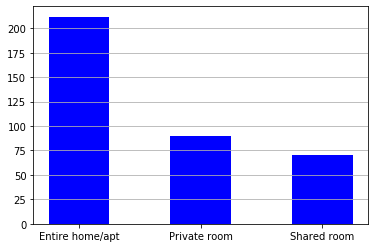

In [12]:
plt.bar(df_roomTypes.index, df_roomTypes["AveragePrice"],
        color='b', align="center", width=0.5)
plt.grid(axis='y')

In [13]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
#https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html
pd.DataFrame([df_ny_air_bnb.groupby(["room_type","neighbourhood_group"])["host_id"].nunique()]).T.unstack(1).sort_values(by="Entire home/apt", axis=1, ascending=False).round(2)

host_id                                    
neighbourhood_group Manhattan Brooklyn Queens Bronx Staten Island
room_type                                                        
Entire home/apt         10571     8649   1849   324           153
Private room             6230     7744   2203   459           113
Shared room               346      233    127    43             6

In [14]:
#total hosts in NY City

In [15]:
var_total_hosts = df_ny_air_bnb["host_id"].nunique()

In [16]:
#https://stackoverflow.com/questions/49153253/pandas-rounding-when-converting-float-to-integer
df_counts_by_neighbour_group = pd.DataFrame([df_ny_air_bnb.groupby(["room_type","neighbourhood_group"])["host_id"].nunique()/var_total_hosts*100]).T.unstack(1).sort_values(by="Entire home/apt", axis=1, ascending=False).round(2)#.astype(str)+"%"

In [17]:
#https://stackoverflow.com/questions/21752399/pandas-dataframe-total-row
df_counts_by_neighbour_group.loc["Total",:] = df_counts_by_neighbour_group.sum(axis=0)
# df_counts_by_neighbour_group.loc[:,"Total"] = df_counts_by_neighbour_group.sum(axis=1)
df_counts_by_neighbour_group
df_counts_by_neighbour_group.round(2).astype(str)+"%"

host_id                                      
neighbourhood_group Manhattan Brooklyn  Queens  Bronx Staten Island
room_type                                                          
Entire home/apt        28.22%   23.09%   4.94%  0.86%         0.41%
Private room           16.63%   20.67%   5.88%  1.23%          0.3%
Shared room             0.92%    0.62%   0.34%  0.11%         0.02%
Total                  45.77%   44.38%  11.16%   2.2%         0.73%

In [18]:
pie_arch = []
pie_arch_value = []

for row in (df_counts_by_neighbour_group.loc["Total",:]):
    pie_arch_value.append((row))
    
for index1, index2 in df_counts_by_neighbour_group.loc["Total",:].index:
    pie_arch.append(index2)
    
colors = ["yellow", "green", "lightblue", "orange"]
# pie_arch_value

([<matplotlib.patches.Wedge at 0x23fbb021320>,
 [Text(-1.4426347080081654, -0.8008152716139944, 'Manhattan'),
  Text(1.644440987655759, 0.1353286300741711, 'Brooklyn'),
  Text(-0.30380671280422866, 1.6217895921651146, 'Queens'),
  Text(-0.9150135580558725, 1.3730441320561888, 'Bronx'),
  Text(-1.0325369159108355, 1.286999423963096, 'Staten Island')],
 [Text(-0.7868916589135446, -0.43680832997126956, '43.91%'),
  Text(0.8969678114485957, 0.07381561640409331, '42.57%'),
  Text(-0.16571275243867017, 0.8846125048173351, '10.71%'),
  Text(-0.4990983043941122, 0.7489331629397392, '2.11%'),
  Text(-0.5632019541331829, 0.7019996857980522, '0.70%')])

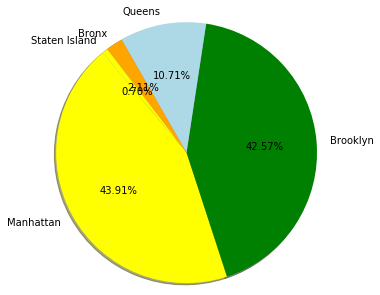

In [19]:
plt.pie(pie_arch_value, labels = pie_arch, colors = colors, autopct="%1.2f%%", shadow=True, startangle=130, radius=1.5)

In [20]:
df_avg_price_by_neighbour_group = pd.DataFrame([df_ny_air_bnb.groupby(["room_type","neighbourhood_group"])["price"].mean()]).T.unstack(1).sort_values(by="Entire home/apt", axis=1, ascending=False).round(2)#.astype(str)+"%"

In [21]:
df_avg_price_by_neighbour_group.loc["Total",:] = df_avg_price_by_neighbour_group.sum(axis=0)
df_avg_price_by_neighbour_group

price                                       
neighbourhood_group Manhattan Brooklyn Staten Island  Queens   Bronx
room_type                                                           
Entire home/apt        249.24   178.33        173.85  147.05  127.51
Private room           116.78    76.50         62.29   71.76   66.79
Shared room             88.98    50.53         57.44   69.02   59.80
Total                  455.00   305.36        293.58  287.83  254.10

In [22]:
x_axis = []
for index1, index2 in df_avg_price_by_neighbour_group.iloc[3,0:5].index:
    x_axis.append(index2)

In [23]:
y_entire_home = []
for val in (df_avg_price_by_neighbour_group.iloc[0,0:5]):
    y_entire_home.append(val)

y_entire_home = np.array(y_entire_home)
    
y_private_room = []
for val in (df_avg_price_by_neighbour_group.iloc[1,0:5]):
    y_private_room.append(val)
    
y_private_room = np.array(y_private_room)

y_shared_room = []
for val in (df_avg_price_by_neighbour_group.iloc[2,0:5]):
    y_shared_room.append(val)
 
y_shared_room = np.array(y_shared_room)

In [24]:
ind = [x for x, _ in enumerate(x_axis)]

Text(0.5, 1.0, 'Average Price By Neighbourhood Group')

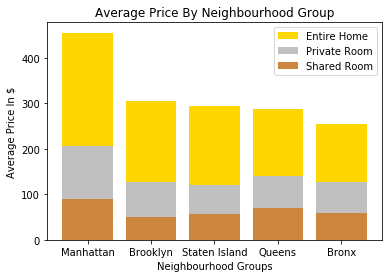

In [25]:
# http://benalexkeen.com/bar-charts-in-matplotlib/
plt.bar(ind, y_entire_home, width=0.8, label='Entire Home', color='gold', bottom=y_private_room+y_shared_room)
plt.bar(ind, y_private_room, width=0.8, label='Private Room', color='silver', bottom=y_shared_room)
plt.bar(ind, y_shared_room, width=0.8, label='Shared Room', color='#CD853F')
plt.xticks(ind, x_axis)
plt.ylabel("Average Price In $")
plt.xlabel("Neighbourhood Groups")
plt.legend(loc="upper right")
plt.title("Average Price By Neighbourhood Group")

In [26]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
#https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html
df_neighbourhood_in_Manhattan = pd.DataFrame(df_ny_air_bnb.loc[df_ny_air_bnb["neighbourhood_group"]=="Manhattan",:].groupby("neighbourhood")["host_id"].nunique()).sort_values(by="host_id", axis=0, ascending=False).round(2)
df_neighbourhood_in_Manhattan_Temp = pd.DataFrame(df_ny_air_bnb.loc[df_ny_air_bnb["neighbourhood_group"]=="Manhattan",:].groupby("neighbourhood")["price"].mean())

In [27]:
#https://www.datacamp.com/community/tutorials/joining-dataframes-pandas
df_neighbourhood_in_Manhattan_count_price = pd.merge(df_neighbourhood_in_Manhattan, df_neighbourhood_in_Manhattan_Temp, on="neighbourhood")

In [28]:
df_neighbourhood_in_Manhattan_count_price = df_neighbourhood_in_Manhattan_count_price.reset_index()
df_neighbourhood_in_Manhattan_count_price

,neighbourhood,host_id,price
0,Harlem,2115,118.974041
1,East Village,1620,186.083108
2,Upper West Side,1588,210.918316
3,Upper East Side,1409,188.948276
4,Hell's Kitchen,1362,204.794178
5,Midtown,980,282.719094
6,Chelsea,901,249.738544
7,East Harlem,895,133.198747
8,Lower East Side,772,186.312843
9,Washington Heights,762,89.610679


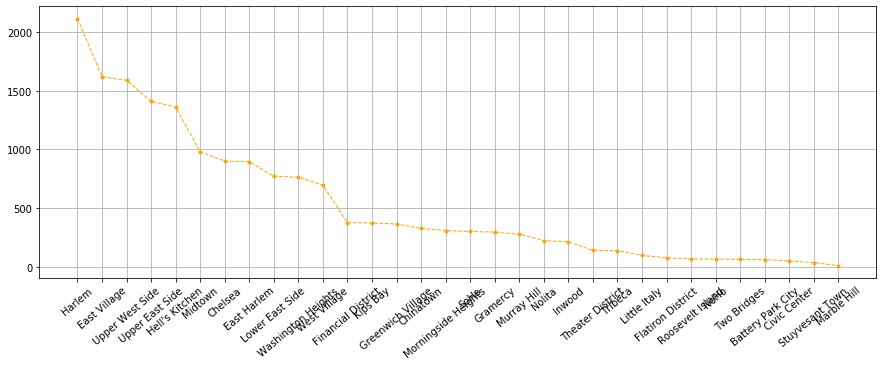

In [29]:
plt.figure(figsize=(15,5))
ax = plt.plot(df_neighbourhood_in_Manhattan_count_price.loc[:,"neighbourhood"]
            , df_neighbourhood_in_Manhattan_count_price.loc[:,"host_id"]
         ,color='orange', marker='o', linestyle='dashed', linewidth=1, markersize=3)
plt.xticks(rotation=40)
plt.grid()

In [30]:
df_neighbourhood_in_Brooklyn = pd.DataFrame(df_ny_air_bnb.loc[df_ny_air_bnb["neighbourhood_group"]=="Brooklyn",:].groupby("neighbourhood")["host_id"].nunique()).sort_values(by="host_id", axis=0, ascending=False).round(2)
df_neighbourhood_in_Brooklyn_Temp = pd.DataFrame(df_ny_air_bnb.loc[df_ny_air_bnb["neighbourhood_group"]=="Brooklyn",:].groupby("neighbourhood")["price"].mean())

In [31]:
df_neighbourhood_in_Brooklyn_count_price = pd.merge(df_neighbourhood_in_Brooklyn, df_neighbourhood_in_Brooklyn_Temp, on="neighbourhood")

In [32]:
df_neighbourhood_in_Brooklyn_count_price = df_neighbourhood_in_Brooklyn_count_price.reset_index()
df_neighbourhood_in_Brooklyn_count_price

,neighbourhood,host_id,price
0,Williamsburg,3372,143.802806
1,Bedford-Stuyvesant,2780,107.678244
2,Bushwick,1895,84.800406
3,Crown Heights,1299,112.480179
4,Greenpoint,877,144.822422
5,Flatbush,521,92.212560
6,Clinton Hill,492,181.893357
7,Park Slope,462,176.312253
8,Prospect-Lefferts Gardens,443,110.401869
9,Fort Greene,406,151.374233


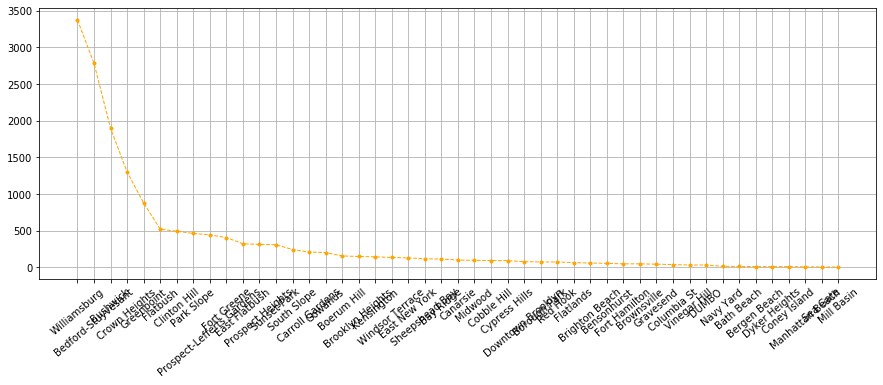

In [33]:
plt.figure(figsize=(15,5))
ax = plt.plot(df_neighbourhood_in_Brooklyn_count_price.loc[:,"neighbourhood"]
            , df_neighbourhood_in_Brooklyn_count_price.loc[:,"host_id"]
         ,color='orange', marker='o', linestyle='dashed', linewidth=1, markersize=3)
plt.xticks(rotation=40)
plt.grid()

In [34]:
# Store latitude and longitude in locations
 # Customize the size of the figure
figure_layout = {
    'width': '900px',
    'height': '500px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout, center=(40.711507, -74.013357), zoom_level=12)

# Filla NaN values and convert to float

In [35]:
# Plot Heatmap
coordinates = [
    (40.689477, -74.044533), # Statue Of Liberty
    (40.783019, -73.965849), # Central Park
    (40.748789, -73.985785), # Empire State
    (40.758153, -73.985543), # Times Square
    (40.759025, -73.978663), # Rockefeller Center
    (40.706525, -73.996875), # Brooklyn Bridge
    (40.752717, -73.978346), # Grand Central Terminal
    (40.712978, -74.013408), # One World Trade Center
    (40.711507, -74.013357), # 9/11 Memorial
    (40.763489, -73.983170) # Broadway
]

In [36]:
# https://jupyter-gmaps.readthedocs.io/en/latest/api.html
markers = gmaps.marker_layer(coordinates)
# Add the layer to the map
fig.add_layer(markers)


In [37]:
fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…